In [30]:
import matplotlib.pyplot as plt
import os

from connectivity import constants as const
from connectivity import visualize as vis
from connectivity import nib_utils as nio
from ipywidgets import widgets

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [45]:
vis.plotting_style()

dirs = const.Dirs()

fdir = os.path.join(os.path.join(dirs.figure, 'SFN_2021'))
if not os.path.exists(fdir):
    os.makedirs(fdir)

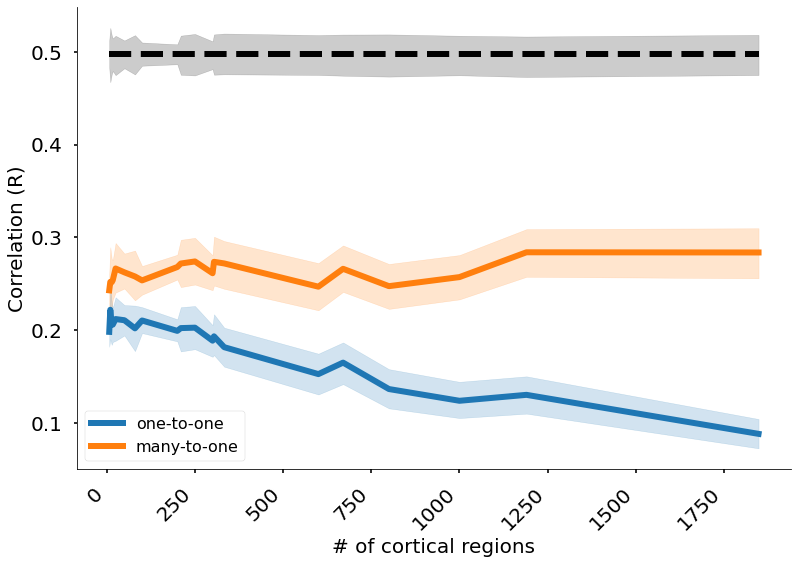

In [48]:
# Model evaluation - best models

vis.plot_eval_predictions(exps=['sc2'], hue='eval_model', noiseceiling=True);
plt.legend(['one-to-one', 'many-to-one'])
plt.xlabel('# of cortical regions', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Correlation (R)', fontsize=20)
plt.gcf().subplots_adjust(bottom=0.15)
plt.savefig(os.path.join(fdir, 'fig1a.png'), dpi=300, layout='tight')

interactive(children=(Dropdown(description='model_name', options=('Schaefer_7_100', 'Schaefer_7_200', 'Schaefe…

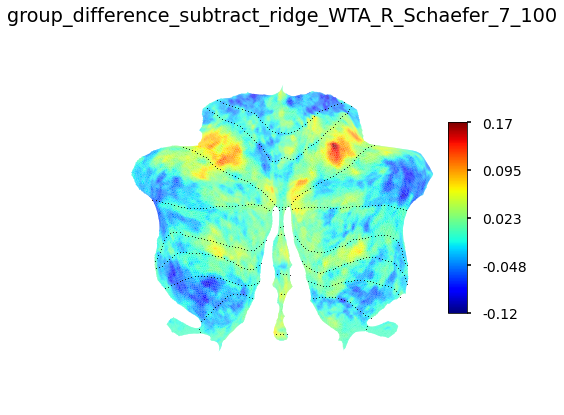

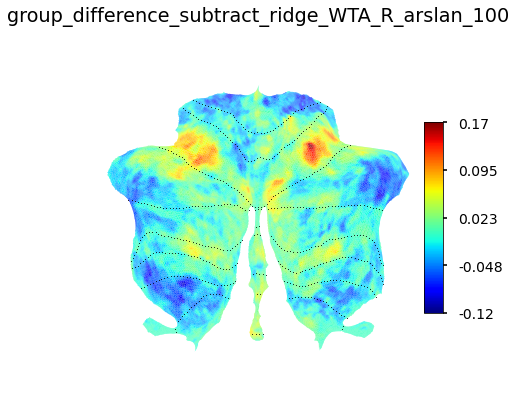

In [65]:
# visualize model comparisons (binary or subtract)

exp = 'sc1'

# get evaluated models
_, cortex_names = vis.get_eval_models(exp=exp)

# get atlases
_, atlases = nio.get_cerebellar_atlases()

@widgets.interact(model_name=cortex_names, 
                 method=['subtract', 'binary'],
                 colorbar=[True, False],
                 roi_summary=[False, True],
                 atlas=atlases)

def plot_difference(model_name, method, colorbar, roi_summary, atlas):
    
    view = vis.map_model_comparison(model_name, 
                                    exp, 
                                    method, 
                                    colorbar, 
                                    rois=roi_summary, 
                                    atlas=atlas, 
                                    title=True, 
                                    save=True)
    